**ANALISANDO FRAUDES, DETALHANDO PASSO A PASSO COMO EU FIZ,
QUAIS CRITÉRIOS UTILIZEI E QUAIS RESULTADOS OBTIVE**

**portfólio feito por Matheus Amaral da Rocha**

In [262]:
# importando o pandas para abrir , visualizar e tratar o dataframe

import pandas as pd

In [263]:
# lendo nosso dataframe de fraude contendo cidade, estado, categoria, cargo e etc

df = pd.read_csv('frauddata.csv')

In [264]:
# solicitando as informações do nosso dataframe a fim de identificar os tipos das
# colunas (int, float e etc.) e verificar se há valores nulos (ausentes), pois
# podem impactar significamente em nossas análises.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

In [265]:
# solicitei as primeiras 3 linhas para visualizar nosso dataframe e tomar uma decisão
# a partir disso ( muito importante para visualizarmos os nomes das colunas e a
# definir quais usaremos para nossa analise.

df.head(3)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1


In [266]:
# selecionei somente as colunas que notei necessárias para a analise
# e coloquei o dataframe original filtrado (df) em outra variavel (f),
# agora (f) receberá o dataframe (df) porém somente com as colunas 
# selecionadas (não alterando o [df] original caso precise usar novamente).

f = df[['trans_date_trans_time', 'category',
        'city', 'state', 'job', 'trans_num','is_fraud']]

In [267]:
# usei head somente para visualizar as informações que tenho disponiveis para trabalhar
# e ver como está meu novo dataframe (f) filtrado com as colunas selecionadas.

f.head(3)

,trans_date_trans_time,category,city,state,job,trans_num,is_fraud
0,04-01-2019 00:58,grocery_net,Wales,AK,"""Administrator, education""",a3806e984cec6ac0096d8184c64ad3a1,1
1,04-01-2019 15:06,shopping_net,Wales,AK,"""Administrator, education""",a59185fe1b9ccf21323f581d7477573f,1
2,04-01-2019 22:37,misc_pos,Wales,AK,"""Administrator, education""",86ba3a888b42cd3925881fa34177b4e0,1


In [268]:
# notei usando info novamente que a coluna is_fraud está como object (string) e preciso dela como int para 
# encontrar o local com maior numero de fraude ( um ponto positivo é a ausencia de nulos , o que facilita demais )
# e consequentemente, sem valores nulos, não precisaremos tratar esses nulos para conseguir converter o tipo
# da coluna.

f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   trans_date_trans_time  14446 non-null  object
 1   category               14446 non-null  object
 2   city                   14446 non-null  object
 3   state                  14446 non-null  object
 4   job                    14446 non-null  object
 5   trans_num              14446 non-null  object
 6   is_fraud               14446 non-null  object
dtypes: object(7)
memory usage: 790.1+ KB


In [269]:
# aqui notei um erro ao alterar o tipo da coluna devido a algum dado na coluna que nao era 
# numérico, impedindo a mudança de tipo e retornando um erro ( no caso estava como object(string))

f['is_fraud'] = f['is_fraud'].astype(int)

# o erro abaixo deixei propositalmente para mostrar como eu corrigi ele ( correção após ele )

ValueError: invalid literal for int() with base 10: '1"2020-12-24 16:56:24"'

In [270]:
# se eu sei que só deve haver 1 = (true) ou 0 = (false) para indicar sim ou não a uma fraude
# fica mais facil encontrar a causa desse erro e tratar devidamente

f[(f['is_fraud'] != '1')&(f['is_fraud'] != '0')]

# pedi no código acima qualquer coisa na coluna 'is_fraud' diferente de '1' e '0'
# (1 e 0 deveriam ser os unicos numeros dentro dessa coluna)
# e retornou para mim 2 linhas contendo : 1"2020-12-24 16:56:24" e 0"2019-01-01 00:00:44",
# (não parece ser um 1 e 0 , em? hahaha)
# se essa coluna é binária (ou boleana) que é (1 para fraude e 0 pora não fraude), ja descobri que precisaria
# consertar esses dois valores que não são nem 1 e nem 0 para dar continuidade as análises
# (tudo isso faz parte ainda do tratamento de dados, antes mesmo das análises começarem).

,trans_date_trans_time,category,city,state,job,trans_num,is_fraud
1781,11-12-2020 23:19,health_fitness,Lakeport,CA,Podiatrist,bfde75d978bb9905a4a8c87440692a4c,"1""2020-12-24 16:56:24"""
7780,31-12-2020 23:59,travel,Mesa,ID,Cartographer,14392d723bb7737606b2700ac791b7aa,"0""2019-01-01 00:00:44"""


In [179]:
# consegui resolver tratando pelo indice usando .loc com numero do indice e
# nome da coluna

f.loc[1781, 'is_fraud'] = '1'
f.loc[7780, 'is_fraud'] = '0'

# alterei 1"2020-12-24 16:56:24" e 0"2019-01-01 00:00:44" para os valores corretos '1' e '0',
# com base no primeiro número de cada um , que indicavam se era 1 ou 0
# porem ainda estão como string usando aspas, preciso corrigir isso também.

In [272]:
# após o tratamento com .loc, sumiram os valores errados que estavam presentes
# repeti o mesmo código usado para identificar os erros, mostrando que, esses
# erros ja não aparecem mais.

f[(f['is_fraud'] != '1')&(f['is_fraud'] != '0')]

# ao executar esse código, sumiram as 2 linhas que estavam me dando trabalho (erros).

,trans_date_trans_time,category,city,state,job,trans_num,is_fraud


In [178]:
# agora vou transformar os numeros em strings para numeros normais para 
# conseguir alterar o tipo dos valores dessa coluna para int

f.loc[f['is_fraud'] == '1', 'is_fraud'] = 1
f.loc[f['is_fraud'] == '0', 'is_fraud'] = 0

# agora '1' virou 1 e '0' virou 0

In [177]:
# agora consegui com exito transformar o tipo em int. Ja posso operar sobre essa coluna
# e começar as análises.

f['is_fraud'] = f['is_fraud'].astype(int)

In [275]:
# tipo da coluna is_fraud agora está como int ( usando info )

f['is_fraud'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14446 entries, 0 to 14445
Series name: is_fraud
Non-Null Count  Dtype
--------------  -----
14446 non-null  int32
dtypes: int32(1)
memory usage: 56.6 KB


In [276]:
# resolvi aqui colocar os nomes das colunas desse dataframe em pt-br 
# facilitando o entendimento dos dados para pessoas que não sabem inglês 
# (acessibilidade)

f = f.rename(columns = {'trans_date_trans_time' : 'data_hora_transação',
                        'category' : 'categoria',
                        'city' : 'cidade',
                        'state' : 'estado',
                        'job' : 'cargo',
                        'is_fraud' : 'fraude?'})

In [277]:
# aqui solicitei uma linha somente do meu df 
# para mostrar as colunas renomeadas devidamente em pt-br

f.head(1)

,data_hora_transação,categoria,cidade,estado,cargo,trans_num,fraude?
0,04-01-2019 00:58,grocery_net,Wales,AK,"""Administrator, education""",a3806e984cec6ac0096d8184c64ad3a1,1


In [278]:
# iterando sobre a coluna fraude para descobrir o numero total de fraudes e armazenar em uma variavel
# 1 = fraudes

cont = 0

for i, each in enumerate(f['fraude?']):
    if each == 1:
        cont = cont + 1

print(f'total de fraudes desse dataframe : {cont}')

# agora sabemos que o total de fraudes ( valores 1 da coluna ) é igual a 1845
# e está devidamente armazenado em uma variavel
# (caso esse df fosse atualizado diariamente com adições de valores 1 [fraude],
# essa iteração tambem alteraria o valor da variável automaticamente após 
# ser executado , deixando automático (caso se mantesse o mesmo nome no dataframe).

total de fraudes desse dataframe : 1845


In [279]:
# analisando o info novamente, sei que existem 14.446 linhas totais do dataframe
# todas contendo somente 1 = (fraude) e 0 = (não fraude)
# e nenhuma delas carregando valores nulos

f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   data_hora_transação  14446 non-null  object
 1   categoria            14446 non-null  object
 2   cidade               14446 non-null  object
 3   estado               14446 non-null  object
 4   cargo                14446 non-null  object
 5   trans_num            14446 non-null  object
 6   fraude?              14446 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 733.7+ KB


In [280]:
# agora vamos descobrir a probabilidade de fraudes usando o bom e velho
# numero de fraudes dividido pelo total de registros incluindo todos os 
# 1 = (fraude) quanto  0 = (não fraudes)
# para isso vamos armazenar a contagem de todas linhas do dataframe em uma
# variavel para conseguirmos executar o calculo corretamente

total_registros = len(f['fraude?'])

# esse len (contagem) também deixaria automático
# caso fossem adicionados novas linhas nesse df
# (caso fosse ligado em um banco de dados ou server)
# (e fosse atualizado diariamente mantendo o mesmo nome)

In [281]:
# agora conseguimos a probabilidade de fraudes assim
# ( dividiremos o total de fraudes (1) pelo total
# de registros incluindo 1 e 0 (fraude e não fraudes)).

print(f'a probabilidade de fraudes é de {cont/total_registros:.0%}')

# 13% das transações foram fraudes, um numero alto demais aue 
# ja geram muitos prejuizos e podem 
# gerar muito mais prejuizos a longo prazo se não forem corrigidos imediatamente !!!

a probabilidade de fraudes é de 13%


In [282]:
# agora vou tentar descobrir os 3 estados com mais fraudes
# para prioridade maior e maior foco !!!

f.groupby('estado')['fraude?'].sum().reset_index().sort_values(by = 'fraude?',
                                                          ascending = False).head(3)

# estado CA ( Califórnia ) tem maior numero de fraudes, porém só
# esses numeros podem não ser suficientes para tomar uma decisão

,estado,fraude?
2,CA,411
6,MO,267
7,NE,238


In [283]:
# Califórnia tem maior numero de fraudes, porem tambem
# o maior numero de não fraudes, então
# temos que analisar mais profundamente para saber se
# a longo prazo, os demais estados não superem a califórnia
# 
f.groupby('estado')['fraude?'].value_counts()

estado  fraude?
AK      0           108
        1            65
AZ      0           609
        1            64
CA      0          2964
        1           411
CO      0           741
        1           115
HI      0           156
        1            16
ID      0           314
        1            33
MO      0          2062
        1           267
NE      0          1222
        1           238
NM      0           882
        1           121
OR      0          1014
        1           197
UT      0           524
        1            73
WA      0          1024
        1           126
WY      0           981
        1           119
Name: count, dtype: int64

In [284]:
# vamos descobrir a probabilidade de fraude de cada estado
# para saber os estados com maior percentual de fraude 
# na relação fraude / total

# com o ultimo agrupamento que fiz acima, note visualmente
# que o estado AK (Alaska) tem uma alta probabilidade de fraude
# conclui isso ao analisar visualmente os numeros mostrados no
# agrupamento acima ( 65 fraudes para 108 transações é um
# numero extremamente alto de fraudes )
# então resolvi iterar com foco nesse aqui
total_ak = 0

for estado, fraude in zip(f['estado'], f['fraude?']):
    if estado == 'AK':
        total_ak = total_ak + 1

fraude_ak = 0

for estado, fraude in zip(f['estado'], f['fraude?']):
    if estado == 'AK' and fraude == 1:
        fraude_ak = fraude_ak + 1

# usei iteração novamente pra deixar mais automático

In [285]:
# percentual de fraude no estado AK
print(f'percentual de fraude AK: {fraude_ak / total_ak:.0%}')



percentual de fraude AK: 38%


In [286]:
# fiz um novo agrupamento e armazenei na variavel chamada (resutado)

resultado = f.groupby('estado')['fraude?'].mean().reset_index().sort_values(by = 'fraude?',
                                                                            ascending = False)
# notei que fazendo esse agrupamento por só conter 1 e 0,
# mesmo com a função mean , 
# estava me retornando os resultados iguais aos da iteração feita acima, então,
# aproveitei para armazenar esse resultado resetando o indice com reset_index
# em uma variavel e plotar um grafico encima disso.


# solicitando top 3 ordenado decrescente, feito
# no agrupamento acima com sort value + ascending False, 
# recebi o resultado dos 3 estados com maiores números de fraude
# em ordem decrescente, com AK liderando o ranking.

resultado.head(3)

,estado,fraude?
0,AK,0.375723
7,NE,0.163014
9,OR,0.162675


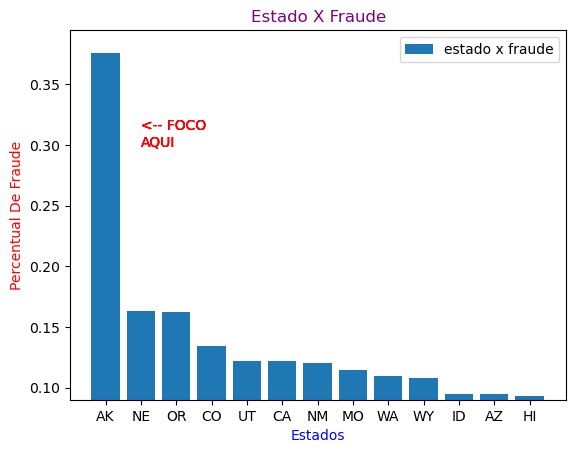

In [287]:
# vou mostrar esse resultado em forma de grafico para melhor visualização e entendimento
# importando matplotlib
import matplotlib.pyplot as plt

# usando o matplotlib para criar um grafico e mostrar o resultado
# de todo tratamento de dado a fim de facilitar a visualização e
# entendimento

fig, ax = plt.subplots()
ax.bar(resultado['estado'], resultado['fraude?'], label = 'estado x fraude')
ax.set_title('estado x fraude'.title(), color = 'purple')
ax.set_ylabel('percentual de fraude'.title(), color = 'red')
ax.set_xlabel('estados'.title(), color = 'blue')
ax.set_ylim(0.09)
ax.set_xlim(-1)
for i in range(5):
    ax.annotate('<-- foco\naqui'.upper(),(1,0.299), color = 'red')
ax.legend()
plt.axis('on')
plt.show()

# descobrimos que apesar do estado CA ter o maior numero de fraudes
# a probabilidade de fraudes em relação ao total de transações
# acaba sendo significativamente menor comparado com o estado AK.

#----------------------------------------------------#


# agora sabemos em ordem os que possuem maior porcentagem de fraude, tal quais devemos dar
# mais foco e consequentemente diminuir prejuizos financeiros a longo prazo !!!

In [288]:
# vamos chamar denovo o top 5 dos nossos dados para tomarmos outro rumo

f.head()

,data_hora_transação,categoria,cidade,estado,cargo,trans_num,fraude?
0,04-01-2019 00:58,grocery_net,Wales,AK,"""Administrator, education""",a3806e984cec6ac0096d8184c64ad3a1,1
1,04-01-2019 15:06,shopping_net,Wales,AK,"""Administrator, education""",a59185fe1b9ccf21323f581d7477573f,1
2,04-01-2019 22:37,misc_pos,Wales,AK,"""Administrator, education""",86ba3a888b42cd3925881fa34177b4e0,1
3,04-01-2019 23:06,grocery_pos,Wales,AK,"""Administrator, education""",3a068fe1d856f0ecedbed33e4b5f4496,1
4,04-01-2019 23:59,health_fitness,Wales,AK,"""Administrator, education""",891cdd1191028759dc20dc224347a0ff,1


**resolvi agora analisar o as cidades que fazem parte do estado com
maior percentual de fraude (ak) e ver qual a cidade com maior
percentual de fraude**

In [289]:
# filtrei meu dataframe para me mostrar somente dados com o estado igual a AK
# ignorando os demais estados (visualizando com head)

ak = f[f['estado'] == 'AK']
ak.head(5)

,data_hora_transação,categoria,cidade,estado,cargo,trans_num,fraude?
0,04-01-2019 00:58,grocery_net,Wales,AK,"""Administrator, education""",a3806e984cec6ac0096d8184c64ad3a1,1
1,04-01-2019 15:06,shopping_net,Wales,AK,"""Administrator, education""",a59185fe1b9ccf21323f581d7477573f,1
2,04-01-2019 22:37,misc_pos,Wales,AK,"""Administrator, education""",86ba3a888b42cd3925881fa34177b4e0,1
3,04-01-2019 23:06,grocery_pos,Wales,AK,"""Administrator, education""",3a068fe1d856f0ecedbed33e4b5f4496,1
4,04-01-2019 23:59,health_fitness,Wales,AK,"""Administrator, education""",891cdd1191028759dc20dc224347a0ff,1


In [290]:
# aqui fiz um agrupamento de fraudes por cidades e
# uma contagem de valores com value_counts para identificar
# quantos 1 (fraudes) e 0 (não fraudes) existem por cada cidade
# do estado AK e reset_index para resetar os indices para o padrão,
# armazenei em uma variavel que chamei de akcity
# akcity = ( estado ak e city para representar as cidades do dataframe ).

akcity = ak.groupby(['cidade'])['fraude?'].value_counts().reset_index()

In [291]:
# aqui chamei minha variavel akcity para visualização dos dados
# e vemos que o agrupamendo pelas cidades do estado do AK
# ficou mais facil para visualização e entendimento do nosso dataframe

akcity

,cidade,fraude?,count
0,Craig,1,14
1,Huslia,0,27
2,Huslia,1,9
3,Kaktovik,1,12
4,Wales,0,81
5,Wales,1,30


In [292]:
# aqui adicionei uma nova coluna no dataframe contendo
# a soma de todos os registros de cada um
# nos retornando uma nova coluna com a soma total dos registros para cada cidade
# o que facilitará e muito para nós conseguirmos chegar no nosso objetivo que é
# achar a cidade com maior percentual dentro do estado que ja possui por si só,
# o maior percentual de fraudes

akcity['transações totais por cidade'] = akcity.groupby('cidade')[['count']].transform('sum')

In [293]:
# aqui exibimos nosso dataframe com a nova coluna de contagem total
# ( note que existem duplicatas porem contendo o mesmo resultado)
# porque essas duplicatas representam a mesma cidade,
# é claro que com um dataframe muito maior ou bigdatas,
# usariamos algumas outras maneiras para evitar essas duplicatas,
# mas nesse caso especifico essas duplicatas não nos causarâo nenhum problema
# nas nossas análises futuras!!!

akcity

,cidade,fraude?,count,transações totais por cidade
0,Craig,1,14,14
1,Huslia,0,27,36
2,Huslia,1,9,36
3,Kaktovik,1,12,12
4,Wales,0,81,111
5,Wales,1,30,111


In [294]:
# agora é a hora que chamo de pulo do gato, para achar o percentual, dividimos
# a parte pelo total ( padrão ), porem como temos um dataframe ao invés de
# simplesmente numeros, posso usar somente um [] ao invés de [[]], o que me retornará
# um series, qual podemos fazer uma divisão usando indices para chegarmos no nosso 
# resultado
#-------------------
# para isso, dividirei as contagens de 1 = (fraude) pela contagem total
# assim descobriremos o percentual de fraudes de cada cidade dentro do estado AK.
display(akcity)
print(f' percentual de fraudes da cidade de Craig = {akcity["count"][0] / akcity["transações totais por cidade"][0]:.0%}')
print(f' percentual de fraudes da cidade de Huslia = {akcity["count"][2] / akcity["transações totais por cidade"][2]:.0%}')
print(f' percentual de fraudes da cidade de Kaktovik = {akcity["count"][3] / akcity["transações totais por cidade"][3]:.0%}')
print(f' percentual de fraudes da cidade de Wales = {akcity["count"][5] / akcity["transações totais por cidade"][5]:.0%}')

# com isso descobrimos o percentual de fraudes de cada cidade em relação ao total de transações de cada um

,cidade,fraude?,count,transações totais por cidade
0,Craig,1,14,14
1,Huslia,0,27,36
2,Huslia,1,9,36
3,Kaktovik,1,12,12
4,Wales,0,81,111
5,Wales,1,30,111


 percentual de fraudes da cidade de Craig = 100%
 percentual de fraudes da cidade de Huslia = 25%
 percentual de fraudes da cidade de Kaktovik = 100%
 percentual de fraudes da cidade de Wales = 27%


In [176]:
# Criando uma nova coluna para armazenar os percentuais
akcity['percentuais_de_fraude'] = 0

# Iterando sobre os índices do DataFrame, calculando percentuais e armazenando
# eles na nova coluna, cada um em uma linha, correspondendo a cada cidade (para plotar)


for i in range(len(akcity)):
    akcity['percentuais_de_fraude'].iloc[i] = akcity['count'].iloc[i] / akcity['transações totais por cidade'].iloc[i]

In [296]:
# abaixo removi todas as linhas desnecessarias e mantive somente
# linhas onde contenham 1 na coluna [fraude?], no caso, o numero 1
# significa que é fraude.

#remoção da linha do indice 1

akcity = akcity.drop(index = 1)

In [297]:
# remoção da linha do indice 4

akcity = akcity.drop(index = 4)

In [298]:
# o mesmo dataframe mostrado pouco acima, porém com a nova coluna
# que criei com a iteração e .loc, e sem os valores 0 na coluna [fraude?]
# mantendo somente linhas com valor 1 (fraude) para mostrar que os
# percentuais de fraudes adicionados na nova coluna estão corretos.

akcity

,cidade,fraude?,count,transações totais por cidade,percentuais_de_fraude
0,Craig,1,14,14,1.00000
2,Huslia,1,9,36,0.25000
3,Kaktovik,1,12,12,1.00000
5,Wales,1,30,111,0.27027


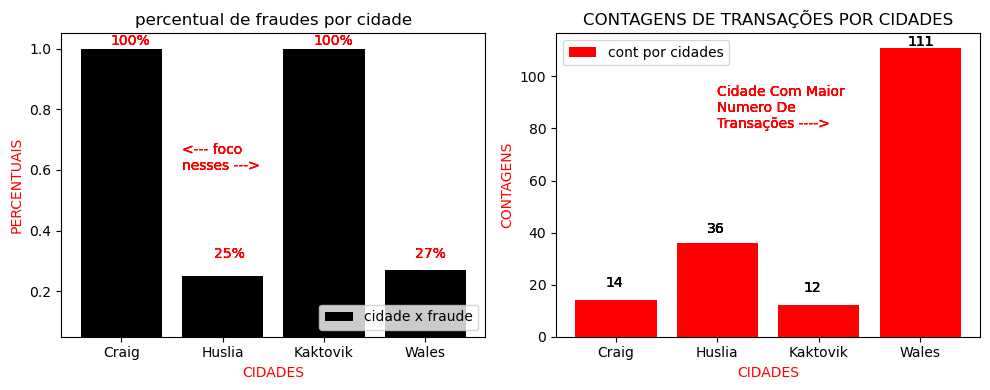

In [299]:
# agora irei mostrar os resultados graficamentes.
# aqui plotei os gráficos, usei annotate para adicionar os percentuais
# sobre as barras e posicionar-los corretamente,
# usei for i in range no
# annotate, para dar mais realce nas porcentagens
# e deixar as informações mais aparentes

fig, ax = plt.subplots(1, 2,figsize = (10, 4))
ax[0].bar(akcity['cidade'], akcity['percentuais_de_fraude'], label = 'cidade x fraude', color = 'black')
ax[0].set_title('percentual de fraudes por cidade')  
ax[0].set_ylabel('percentuais'.upper(), color = 'red')
ax[0].set_xlabel('cidades'.upper(), color = 'red')
ax[0].set_ylim(0.05)
for i in range(5):   
    ax[0].annotate('100%', (-0.11, 1.01), color = 'red')
for i in range(5):    
    ax[0].annotate('25%', (0.91, 0.31), color = 'red')
for i in range(5):
    ax[0].annotate('100%', (1.9, 1.01), color = 'red')
for i in range(5):
    ax[0].annotate('27%', (2.9, 0.31), color = 'red')
for i in range(5):
    ax[0].annotate('<--- foco\nnesses --->', (0.6, 0.6), color = 'red')
ax[0].legend(loc = 'lower right')

#---------------------------------------------#

# aqui plotei o segundo gráfico mostrando a contagem total
# de transações feitas nas cidades para fim de comparativo
# de percentual de fraudes e contagem de transações por cidades.

ax[1].bar(akcity['cidade'], akcity['transações totais por cidade'], label = 'cont por cidades', color = 'red')
ax[1].set_title('contagens de transações por cidades'.upper())
ax[1].set_ylabel('contagens'.upper(), color = 'red')
ax[1].set_xlabel('cidades'.upper(), color = 'red')
ax[1].legend()
for i in range(5):
    ax[1].annotate('14', (-0.1, 19))
for i in range(5):
    ax[1].annotate('36', (0.9, 40))
for i in range(5):
    ax[1].annotate('12', (1.85, 17))
for i in range(5):
    ax[1].annotate('111', (2.87, 111.6))
for i in range(5):
    ax[1].annotate('cidade com maior\nnumero de\ntransações ---->'.title(),(1, 80), color = 'red')
plt.tight_layout()
plt.show()

**Acima, chegamos nos resultados (cidades com maior percentual de fraudes)
e (contagem total de transações feitas em cada uma delas)**

**Conseguindo essas duas informações, consigo saber quais estados/cidades devo priorizar e tomar
as devidas decisões sobre elas para diminuir o prejuizo e as dores de cabeça em relação a esse
numero de fraudes**